# Predicting Accelerometer Input

## Introduction

### Goals and Keysteps

Delete THIS: https://beckernick.github.io/activity-prediction/

This section will describe the dataset and summarizes the goal of the project and key steps that were performed.

Four dataset will be used as provided at the course instruction. Those are `train_labels.csv` (`df1`), `train_time_series.csv` (`df2`), `test label.csv` (`df3`), and `test_time_series` (`df4`). Please note that only the necessary column will be used. Thus `.drop` function is used for each dataset.

The $goal$ of this project is to predict the value of the `label` from the `test_time_series` (`df4`).

Key steps:
- sdsdsddsdsds
- dsdsdsdsdsdsdsdafsdsfd
- dfsdfskjdgfisugfjbekjeb
- efhkjeabflkajegflae

### Importing the Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
tf.__version__

'2.2.0'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
import pandas as pd
df1 = pd.read_csv("train_time_series.csv")
df1 = df1.drop("timestamp", axis=1)
df1 = df1.drop("accuracy", axis=1)
df1 = df1.set_index('Unnamed: 0')
df1

,UTC time,x,y,z
Unnamed: 0,,,,
20586,2019-08-06T16:45:30.787,-0.006485,-0.934860,-0.069046
20587,2019-08-06T16:45:30.887,-0.066467,-1.015442,0.089554
20588,2019-08-06T16:45:30.987,-0.043488,-1.021255,0.178467
20589,2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985
20590,2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450
...,...,...,...,...
24325,2019-08-06T16:51:45.638,0.024384,-0.710709,0.030304
24326,2019-08-06T16:51:45.738,0.487228,-1.099136,-0.015213
24327,2019-08-06T16:51:45.838,0.369446,-0.968506,0.036713


`df1` is sampled every 0.1 sec

In [4]:
df2 = pd.read_csv("train_labels.csv")
df2 = df2.drop("timestamp", axis=1)
df2 = df2.drop("UTC time", axis=1)
df2 = df2.set_index('Unnamed: 0')
df2

,label
Unnamed: 0,
20589,1
20599,1
20609,1
20619,1
20629,1
...,...
24289,4
24299,4
24309,4


`df2` is sampled every 1 sec. Following encoding will be used:
- 1: standing
- 2: walking
- 3: stairs down
- 4: stairs up

In [5]:
train_data = pd.concat([df1, df2], axis=1)
train_data = train_data.fillna(method='ffill')
train_data.isna().sum()

UTC time    0
x           0
y           0
z           0
label       3
dtype: int64

In [6]:
train_data = train_data.dropna()
train_data.dtypes

UTC time     object
x           float64
y           float64
z           float64
label       float64
dtype: object

In [7]:
train_data.isna().sum()

UTC time    0
x           0
y           0
z           0
label       0
dtype: int64

In [8]:
train_data.loc[train_data['label']==1,'activity']='standing'
train_data.loc[train_data['label']==2,'activity']='walking'
train_data.loc[train_data['label']==3,'activity']='stairs down'
train_data.loc[train_data['label']==4,'activity']='stairs up'
train_data.set_index('UTC time')

,x,y,z,label,activity
UTC time,,,,,
2019-08-06T16:45:31.087,-0.053802,-0.987701,0.068985,1.0,standing
2019-08-06T16:45:31.188,-0.054031,-1.003616,0.126450,1.0,standing
2019-08-06T16:45:31.288,-0.010880,-0.967575,0.170898,1.0,standing
2019-08-06T16:45:31.388,0.052841,-0.982330,0.235565,1.0,standing
2019-08-06T16:45:31.488,0.032974,-1.053207,0.256714,1.0,standing
...,...,...,...,...,...
2019-08-06T16:51:45.638,0.024384,-0.710709,0.030304,4.0,stairs up
2019-08-06T16:51:45.738,0.487228,-1.099136,-0.015213,4.0,stairs up
2019-08-06T16:51:45.838,0.369446,-0.968506,0.036713,4.0,stairs up


In [9]:
df3 = pd.read_csv("test_labels.csv")
df3 = df3.drop("UTC time", axis=1)
df3 = df3.drop("timestamp", axis=1)
df3 = df3.set_index('Unnamed: 0')
df3

,label
Unnamed: 0,
24339,NaN
24349,NaN
24359,NaN
24369,NaN
24379,NaN
...,...
25539,NaN
25549,NaN
25559,NaN


In [10]:
df4 = pd.read_csv("test_time_series.csv")
df4.columns = ['Unnamed: 0', 'timestamp', 'UTC time', 'accuracy','x','y','z']
df4 = df4[['Unnamed: 0', 'UTC time', 'x','y','z']]
df4 = df4.set_index('Unnamed: 0')
df4

,UTC time,x,y,z
Unnamed: 0,,,,
24330,2019-08-06T16:51:46.139,0.034286,-1.504456,0.157623
24331,2019-08-06T16:51:46.239,0.409164,-1.038544,0.030975
24332,2019-08-06T16:51:46.340,-0.234390,-0.984558,0.124771
24333,2019-08-06T16:51:46.440,0.251114,-0.787003,0.054810
24334,2019-08-06T16:51:46.540,0.109924,-0.169510,0.235550
...,...,...,...,...
25575,2019-08-06T16:53:50.975,0.036499,-0.724823,0.553802
25576,2019-08-06T16:53:51.075,-0.159241,0.307022,0.142410
25577,2019-08-06T16:53:51.175,-0.037964,-0.673706,1.065445


In [11]:
test_data = pd.concat([df4,df3],axis=1)
test_data.set_index('UTC time')

,x,y,z,label
UTC time,,,,
2019-08-06T16:51:46.139,0.034286,-1.504456,0.157623,NaN
2019-08-06T16:51:46.239,0.409164,-1.038544,0.030975,NaN
2019-08-06T16:51:46.340,-0.234390,-0.984558,0.124771,NaN
2019-08-06T16:51:46.440,0.251114,-0.787003,0.054810,NaN
2019-08-06T16:51:46.540,0.109924,-0.169510,0.235550,NaN
...,...,...,...,...
2019-08-06T16:53:50.975,0.036499,-0.724823,0.553802,NaN
2019-08-06T16:53:51.075,-0.159241,0.307022,0.142410,NaN
2019-08-06T16:53:51.175,-0.037964,-0.673706,1.065445,NaN


In [12]:
test_data.isna().sum()

UTC time       0
x              0
y              0
z              0
label       1250
dtype: int64

## Methods 

This section explains the process and techniques used, such as data cleaning, data exploration and visualization, any insights gained, and your modeling approach.

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 20589 to 24329
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UTC time  3741 non-null   object 
 1   x         3741 non-null   float64
 2   y         3741 non-null   float64
 3   z         3741 non-null   float64
 4   label     3741 non-null   float64
 5   activity  3741 non-null   object 
dtypes: float64(4), object(2)
memory usage: 204.6+ KB


In [14]:
train_data.isnull().sum()

UTC time    0
x           0
y           0
z           0
label       0
activity    0
dtype: int64

In [15]:
#defining tracking per second
Fs = 10

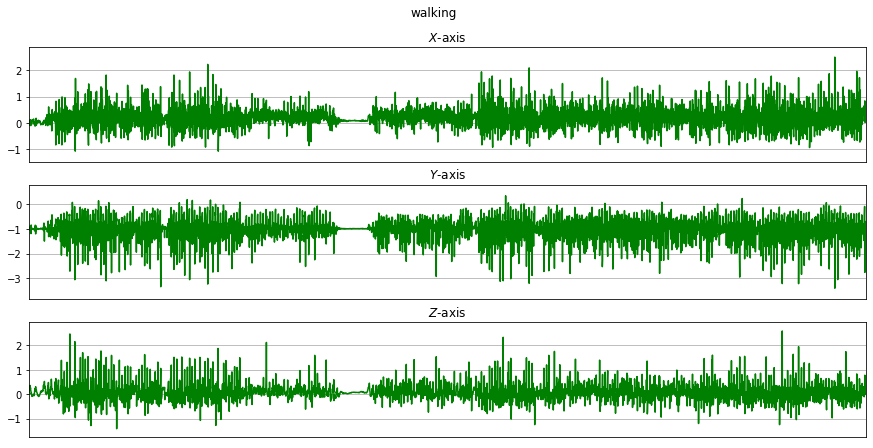

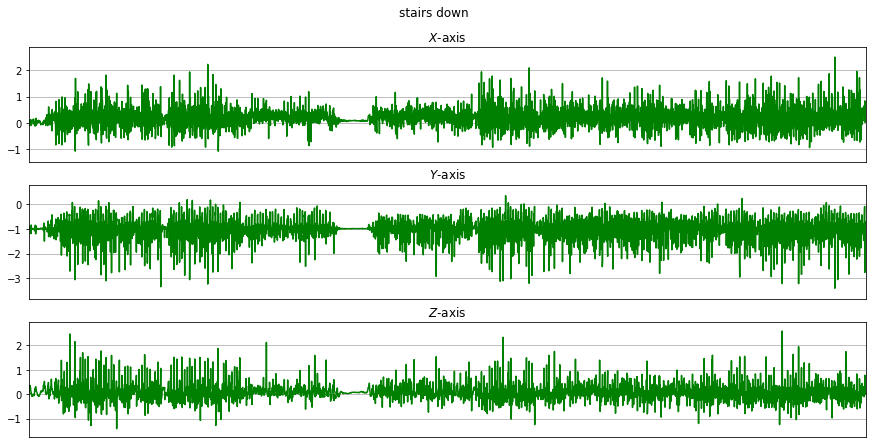

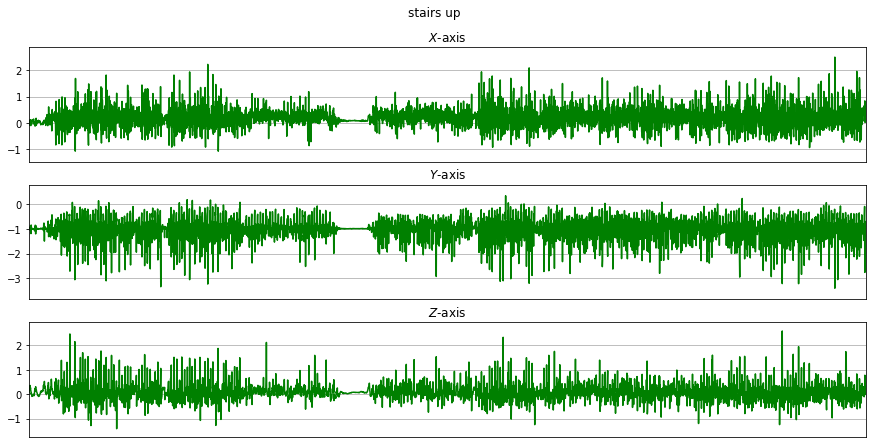

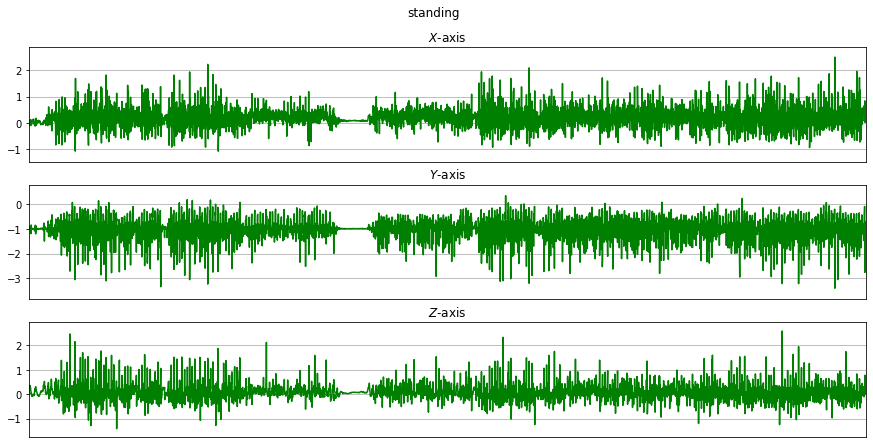

In [16]:
def plot_axis(ax, x, y, title):
    ax.plot(x, y, "g")
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
    ax.set_xlim([min(x),max(x)])
    ax.grid(True)
    
def plot_activity(activity, df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15,7), sharex=True)
    plot_axis(ax0, train_data['UTC time'], train_data['x'], '$X$-axis')
    plot_axis(ax1, train_data['UTC time'], train_data['y'], '$Y$-axis')
    plot_axis(ax2, train_data['UTC time'], train_data['z'], '$Z$-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

activities = train_data['activity'].value_counts().index
    
for activity in activities:
    plot_train_data = [(train_data["activity"]==activity)][:Fs*10]
    plot_activity(activity, plot_train_data)  

In [17]:
activities = train_data['activity'].value_counts().index
activities

Index(['walking', 'stairs down', 'stairs up', 'standing'], dtype='object')

In [18]:
train_data['activity'].value_counts()

walking        2130
stairs down     880
stairs up       461
standing        270
Name: activity, dtype: int64

In [19]:
#balancing the data since every activity has different amount of data
walking = train_data[train_data['activity']=='walking'].head(270).copy()
stairs_down = train_data[train_data['activity']=='stairs down'].head(270).copy()
stairs_up= train_data[train_data['activity']=='stairs up'].head(270).copy()
standing = train_data[train_data['activity']=='standing'].head(270).copy()
train_balanced = pd.DataFrame()
train_balanced = train_balanced.append([walking, stairs_down, stairs_up, standing])
train_balanced['activity'].value_counts()

standing       270
stairs down    270
stairs up      270
walking        270
Name: activity, dtype: int64

In [20]:
train_balanced = train_balanced.drop('activity',axis=1)
train_balanced

,UTC time,x,y,z,label
Unnamed: 0,,,,,
20679,2019-08-06T16:45:40.108,0.154510,-0.843460,0.010544,2.0
20680,2019-08-06T16:45:40.208,0.334381,-0.960007,0.024582,2.0
20681,2019-08-06T16:45:40.308,-0.063034,-0.952179,0.062042,2.0
20682,2019-08-06T16:45:40.409,0.233994,-0.957932,0.038834,2.0
20683,2019-08-06T16:45:40.509,0.245575,-0.982086,-0.061966,2.0
...,...,...,...,...,...
22104,2019-08-06T16:48:03.028,0.158478,-1.002533,0.214417,1.0
22105,2019-08-06T16:48:03.128,0.206070,-1.022842,0.281006,1.0
22106,2019-08-06T16:48:03.228,0.276306,-0.936661,0.286285,1.0


In [44]:
X = train_balanced[['x', 'y', 'z']]
y = train_balanced[['label']]
sc = StandardScaler()
X = sc.fit_transform(X)
scaled_X = pd.DataFrame(data=X, columns=['x', 'y', 'z'])
scaled_X['label'] = y.values
scaled_X

,x,y,z,label
0,-0.122324,0.398510,-0.316849,2.0
1,0.492496,0.073651,-0.269941,2.0
2,-0.865918,0.095470,-0.144768,2.0
3,0.149359,0.079436,-0.222319,2.0
4,0.188945,0.012108,-0.559139,2.0
...,...,...,...,...
1075,-0.108763,-0.044885,0.364388,1.0
1076,0.053913,-0.101495,0.586895,1.0
1077,0.293988,0.138725,0.604536,1.0
1078,0.195830,0.403104,0.569151,1.0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)
X_train.shape, X_test.shape

((864, 3), (216, 3))

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

/Users/madesgputra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  7  2  3]
 [ 5 26 14  9]
 [ 1 10 33 10]
 [ 6 10 11 27]]


((40, 3, 1), (40, 3, 1))

Epoch 1/10
2/2 [==============================] - 1s 404ms/step - loss: 3.7827 - accuracy: 0.2683 - val_loss: 3.6349 - val_accuracy: 0.2727
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 2.3552 - accuracy: 0.2683 - val_loss: 1.5623 - val_accuracy: 0.1818
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 1.5900 - accuracy: 0.1951 - val_loss: 1.4543 - val_accuracy: 0.1818
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 1.4906 - accuracy: 0.2683 - val_loss: 1.4102 - val_accuracy: 0.2727
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 1.4370 - accuracy: 0.2683 - val_loss: 1.4063 - val_accuracy: 0.2727
Epoch 6/10
2/2 [==============================] - 0s 27ms/step - loss: 1.5637 - accuracy: 0.1220 - val_loss: 1.3830 - val_accuracy: 0.2727
Epoch 7/10
2/2 [==============================] - 0s 29ms/step - loss: 1.4300 - accuracy: 0.2683 - val_loss: 1.3937 - val_accuracy: 0.2727
Epoch 8/10
2/2 [==========

## Result

This section presents the modeling results and discusses the model performance.

In [53]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 2 

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Conclusion

This section will give a brief summary of the report

In [ ]:
df1.columns = ['Unnamed: 0', 'timestamp', 'UTC time', 'accuracy','x','y','z']
df1 = df1[['timestamp', 'x','y','z']]

df2 = df2.drop("Unnamed: 0", axis=1)
df2 = df2.drop("UTC time", axis=1)